# Standard Error of the Mean Revisted

Let's return to a topic we first discussed up in our introduction to simulation -- the standard error of the mean.

Here was the scenario we explored:

1. You want to learn about a variable $X$ in a population of interest.  

2. Assume $X \sim N(\mu,\sigma)$.  

3. You take a random sample of size $n$ from the population and estimate the sample mean $\overline{x}$

4. You repeat step 3 a large number of times, calculating a new sample mean each time.

5. We call the _distribution of sample means_ the **sampling distribution of the mean** (note that you can also estimate the sampling distribution for any  statistic of interest).

6. You examine the spread of your sample means. You will find that the _sampling distribution of the mean_ is approximately normally distributed with mean $\sim\mu$, and with a standard deviation $\sim\frac{\sigma}{\sqrt{n}}$. 
    $$
\overline{x} \sim N \left( \mu, \frac{\sigma}{\sqrt{n}}\ \right)
    $$
    
We refer to the standard deviation of a sampling distibution of a statistic as the **standard error** of that statistic.  When the statistic of interest is the mean, this is the **standard error of the mean** (standard errors of the mean are often just referred to as "standard errors" as this is the most common standard error one usually calculates)

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use("bmh")

In [2]:
np.random.seed(20160222) # setting seed insures reproducability

mu, sigma = 10, 2
popn = stats.norm(loc=mu, scale=sigma)

ssizes = [25, 50, 100, 200, 400]
samples = [popn.rvs(size=(sz,100)) for sz in ssizes]
means = [np.mean(sample, axis=0) for sample in samples] 
se = [np.std(mean) for mean in means]

### Explanation of  code above

The code above contains three list comprehensions for very compactly simulating sampling distribution of the man

1. Create a list of sample sizes to simulate (`ssizes`)
2. For each sample size (`sz`), generate random 100 samples, and store those samples in a matrix of size `sz` $\times$ 100 (i.e. each column is a sample)
3. For each matrix created in step 2, calculate column means (= sample means)
4. For each set of sample means in 3, calculate the standard deviation (= standard error)

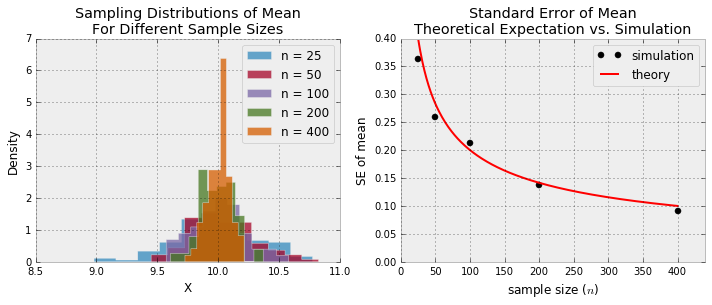

In [3]:
# make a pair of plots
ssmin, ssmax = min(ssizes), max(ssizes)
theoryss = np.linspace(ssmin, ssmax, 250)

fig, (ax1, ax2) = plt.subplots(1,2)  # 1 x 2 grid of plots
fig.set_size_inches(12,4)

# plot histograms of sampling distributions
for (ss,mean) in zip(ssizes, means):
    ax1.hist(mean, normed=True, histtype='stepfilled', alpha=0.75, label="n = %d" % ss)

ax1.set_xlabel("X")
ax1.set_ylabel("Density")
ax1.legend()
ax1.set_title("Sampling Distributions of Mean\nFor Different Sample Sizes")

# plot simulation SE of mean vs theory SE of mean
ax2.plot(ssizes, se, 'ko', label='simulation')
ax2.plot(theoryss, sigma/np.sqrt(theoryss), color='red', label="theory")
ax2.set_xlim(0, ssmax*1.1)
ax2.set_ylim(0, max(se)*1.1)
ax2.set_xlabel("sample size ($n$)")
ax2.set_ylabel("SE of mean")
ax2.legend()
ax2.set_title("Standard Error of Mean\nTheoretical Expectation vs. Simulation")

pass

# Sample Estimate of the Standard Error of the Mean

In real-life life, we don't have access to the sampling distribution of the mean or the true population parameter $\sigma$ from which can calculate the standard error of the mean. However, we can still use our unbiased sample estimator of the standard deviation, $s$, to estimate the standard error of the mean.

$$
{SE}_{\overline{x}} = \frac{s}{\sqrt{n}}
$$

# Conditions for sampling distribution to be nearly normal

For the sampling distribution of the mean to be nearly normal with ${SE}_\overline{x}$ accurate, the following conditions should hold:

* Sample observations are independent
* Sample size is large  ($n \geq 30$ is good rule of thumb)
* Population distribution is not strongly skewed


# Confidence Intervals for the Mean

We know that given a random sample from a population of interest, the mean of $X$ in our random sample is unlikely to be the true population mean of $X$.  However, our simulations have taught us a number of things:

1. As  sample size increases, the sample estimate of the mean is more likely to be close to the true mean
2. As sample size increases, the standard deviation of the sampling distribution of the mean (= standard error of the mean) decreases

We can use this knowledge to calculate _plausible ranges of values_ for the mean.  We call such ranges **confidence intervals** for the mean (the idea of confidence intervals can apply to other statistics as well). We're going to express our confidence intervals in terms of multiples of the standard error. 

Let's start by using simulation to explore how often our confidence intervals capture the true mean when we base our confidence intervals on different multiples, $z$, of the SE.

$$
{CI}_\overline{x}  = \overline{x} \pm  (z \times {SE}_\overline{x})
$$

For the purposes of this simulation, let's consider samples of size 50, drawn from the same population of interest as before (`popn` above). We're going to generate a large number of such samples, and for each sample we will calculate the CI of the mean using the formula above.  We will then ask, "for what fraction of the samples did our CI overlap the true population mean"?  This will give us a sense of how well different confidence intervals do in providing a plausible range for the true mean.


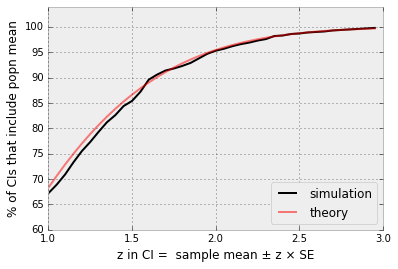

In [4]:
N = 1000
samples50 = popn.rvs(size=(50, N)) # N samples of size 50
means50 = np.mean(samples50, axis=0) # sample means
std50 = np.std(samples50, axis=0, ddof=1) # sample std devs
se50 = std50/np.sqrt(50) # sample standard errors

frac_overlap_mu = []
zs = np.arange(1,3,step=0.05)
for z in zs:
    lowCI = means50 - z*se50
    highCI = means50 + z*se50 
    overlap_mu = np.logical_and(lowCI <= mu, highCI >= mu)
    frac = np.count_nonzero(overlap_mu)/N
    frac_overlap_mu.append(frac)
    
frac_overlap_mu = np.array(frac_overlap_mu)

plt.plot(zs, frac_overlap_mu * 100, 'k-', label="simulation")
plt.ylim(60, 104)
plt.xlim(1, 3)
plt.xlabel("z in CI =  sample mean ± z × SE")
plt.ylabel(u"% of CIs that include popn mean")

# plot theoretical expectation
stdnorm = stats.norm(loc=0, scale=1)
plt.plot(zs, (1 - (2* stdnorm.sf(zs)))*100, 'r-', alpha=0.5, label="theory")
plt.legend(loc='lower right')

pass

## Interpreting our simulation

How should we interpret the results above?  We found as we increased the scaling of our confidence intervals (larger $z$), the true mean was within sample confidence intervals a greater proportion of the time. For example, when $z = 1$ we found that the true mean was within our CIs roughly 67% of the time, while at $z = 2$ the true mean was within our confidence intervals approximately 95% of the time.

We call $x \pm 2 \times {SE}_\overline{x}$ the approximate 95% confidence interval of the mean (see below for exact values of z). Given such a CI calculated from a random sample we can say we are "95% confident" that we have captured the true mean within the bounds of the CI (subject to the caveats about the sampling distribution above).  By this we mean if we took many samples and built a confidence interval from each sample using the equation above, then about 95% of those intervals would contain the actual mean, μ. Note that this is exactly what we did in our simulation!


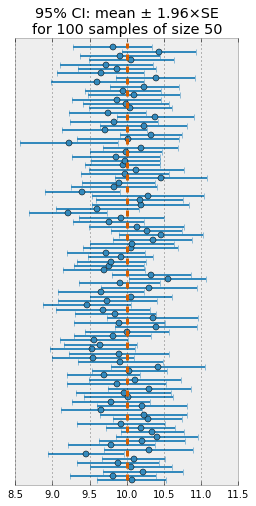

In [7]:
ndraw = 100
x = means50[:ndraw]
y = range(0,ndraw)
plt.errorbar(x, y, xerr=1.96*se50[:ndraw], fmt='o')
plt.vlines(mu, 0, ndraw, linestyle='dashed', color='#D55E00', linewidth=3, zorder=5)
plt.ylim(-1,101)
plt.yticks([])
plt.title("95% CI: mean ± 1.96×SE\nfor 100 samples of size 50")
fig = plt.gcf()
fig.set_size_inches(4,8)

## Generating a table of CIs and corresponding margins of error

The table below gives the percent CI and the corresponding **margin of error** ($z \times {SE}$) for that confidence interval.

In [6]:
perc = np.array([.80, .90, .95, .99, .997])
zval = stdnorm.ppf(1 - (1 - perc)/2)  # account for the two tails of the sampling distn

print("% CI \tz × SE")
print("-----\t------")
for (i,j) in zip(perc, zval):
    print("{:5.1f}\t{:6.2f}".format(i*100, j))  
    # see the string docs (https://docs.python.org/3.4/library/string.html)
    # for information on how formatting works 
                                            

% CI 	z × SE
-----	------
 80.0	  1.28
 90.0	  1.64
 95.0	  1.96
 99.0	  2.58
 99.7	  2.97


# Interpretting Confidence Intervals

You should be careful in interpretting confidence intervals.

The correct interpretation is wording like:

> We are XX% confident that the population parameter is between...